In [23]:
import os
# import pandas as pd
import xml.etree.ElementTree as ET
from functools import reduce
# import numpy as np
import urllib.parse

In [223]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#################

def train_test_split(path, split=0.9):
    """
    Split data to train and test
    """
    with open(path) as file:
        lines = file.readlines()
        
    np.random.shuffle(lines)
    
    train = lines[:int(len(lines) * split)]
    val = lines[len(training_data):]
    return train, val

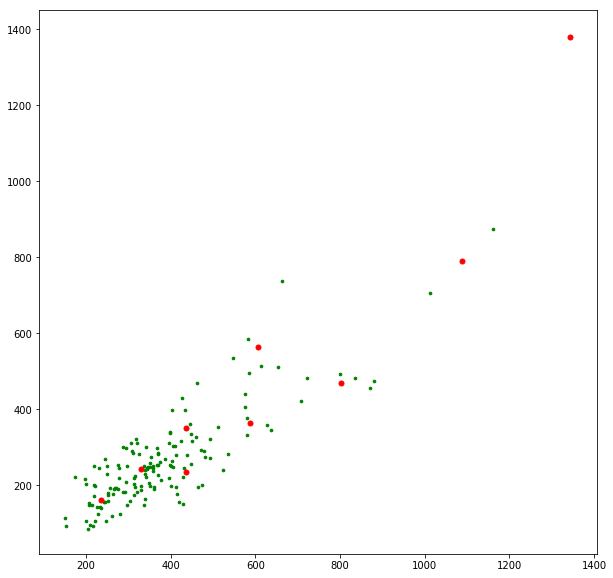

In [230]:
################################
'''
Finding anchor boxes
'''
def get_anchors(path, num_anchors):
    '''
    Takes data and number of anchors required then returns anchor boxes
    Parameters
    ----------
    path: string
        path to labelled data in text forrmat
    num_anchors: int
        number of anchor boxes required
    
    Returns
    -------
    centroids : ndarray
        array of anchor boxes
    '''
    with open(path) as f:
        lines = f.readlines()
    
    boxData=[]
    for line in lines:
        line = line.split()
        box = [int(x) for x in line[1:][0].split(',') if x != '']
        boxData.append(box)
    boxData = np.array(boxData)
    
    boxes_wh = boxData[...,2:4] - boxData[...,0:2]
    
    kmeans = KMeans(n_clusters=num_anchors)
    
    kmeans = kmeans.fit(boxes_wh)
    centroids = kmeans.cluster_centers_
    return centroids

path = './data.txt'
n = 9
centroids = get_anchors(path, n)

plt.figure(figsize=(10,10))
plt.scatter(boxes_wh[...,0], boxes_wh[...,1], c='green', s=7)
plt.scatter(centroids[...,0], centroids[...,1], c='red', s=25)

In [227]:
centroids.astype(int)

array([[ 271,  202],
       [ 612,  382],
       [1342, 1379],
       [ 359,  244],
       [1087,  791],
       [ 586,  549],
       [ 821,  477],
       [ 450,  305],
       [ 221,  127]])

In [ ]:
#######################################
'''
Converting xml to text
'''

In [27]:
for im in os.listdir('./Data/images/'):
    if im.endswith('.xml'):
        print(im)

In [93]:
path = './Data/images/'
labels = ['macncheese']

for im in os.listdir(path):
    if im.endswith('.xml'):
        im = os.path.join(path, im)
        xml_list = []
        line = []
        tree = ET.parse(im)
        root = tree.getroot()
        
        for member in root.findall('size'):
            w = int(member[0].text)
            h = int(member[1].text)
        
        im = im.rsplit( ".", 1 )[ 0 ]+'.jpg'
        im = urllib.parse.quote(im) # To handle space or special charecter in file name
        line.append([im]) 
        
        for member in root.findall('object'):
            label = labels.index(member[0].text)
            line.append([
                     str(' '+ str(round(int(member[4][0].text)*w//int(root.find('size')[0].text),2))),
                     round(int(member[4][1].text)*h//int(root.find('size')[1].text),2),
                     round(int(member[4][2].text)*w//int(root.find('size')[0].text),2),
                     round(int(member[4][3].text)*h//int(root.find('size')[1].text),2),
                     label
            ])
        
        line = reduce(lambda x,y: x+y,line)
        with open ('data.txt', 'a') as fo:
            fo.write(','.join([str(n) for n in line]))
            fo.write(' \n')

In [94]:
with open('./data.txt') as f:
        lines = f.readlines()

In [95]:
lines

['./Data/images/mac-and-cheese.jpg, 26,263,572,797,0 \n',
 './Data/images/212948802_8666ee604c.jpg, 8,8,500,279,0 \n',
 './Data/images/66046_640x428.jpg, 73,67,552,357,0 \n',
 './Data/images/thumb_600.jpg, 7,5,590,589,0 \n',
 './Data/images/3553276452_0915930a17.jpg, 1,15,388,284,0 \n',
 './Data/images/dscf5377.jpg, 1303,744,2645,2123,0 \n',
 './Data/images/66595-1-zoom.jpg, 135,80,397,199,0 \n',
 './Data/images/2755589202_5309e9410a.jpg, 53,47,398,290,0 \n',
 './Data/images/1253354606_2a367f0ea4.jpg, 57,66,428,347,0 \n',
 './Data/images/Pumpkin-Pasta.jpg, 63,282,490,711,0 \n',
 './Data/images/3001170276_3e0d7a9f43.jpg, 139,27,500,222,0 \n',
 './Data/images/ad43da3c-1142-484c-947a-de74d0e0d416.jpg, 61,1,341,125,0 \n',
 './Data/images/Southern-Mac-Cheese.jpg, 78,91,369,272,0 \n',
 './Data/images/macaroni-cheese-rs-640874-x.jpg, 58,63,300,218,0 \n',
 './Data/images/mac-and-cheese-for-one-image.jpg, 44,289,625,620,0 \n',
 './Data/images/50-BEST-Kids-Lunch-and-Snack-Ideas-19.jpg, 43,170,70